<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Relevant-Libraries" data-toc-modified-id="Import-Relevant-Libraries-1">Import Relevant Libraries</a></span></li><li><span><a href="#Read-Data-File" data-toc-modified-id="Read-Data-File-2">Read Data File</a></span></li><li><span><a href="#Train-Test-Split-and-Feature-Scaling" data-toc-modified-id="Train-Test-Split-and-Feature-Scaling-3">Train Test Split and Feature Scaling</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4">Linear Regression</a></span></li><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-5">Lasso Regression</a></span></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-6">Ridge Regression</a></span></li><li><span><a href="#Elastic-Net-Regression" data-toc-modified-id="Elastic-Net-Regression-7">Elastic Net Regression</a></span></li><li><span><a href="#K-Nearest-Neighbors-Regression" data-toc-modified-id="K-Nearest-Neighbors-Regression-8">K Nearest Neighbors Regression</a></span></li><li><span><a href="#Decision-Tree-Regression" data-toc-modified-id="Decision-Tree-Regression-9">Decision Tree Regression</a></span></li><li><span><a href="#Random-Forest-Regression" data-toc-modified-id="Random-Forest-Regression-10">Random Forest Regression</a></span></li><li><span><a href="#Deep-Neural-Networks" data-toc-modified-id="Deep-Neural-Networks-11">Deep Neural Networks</a></span></li><li><span><a href="#ML-Algorithm-Performance-Visualization" data-toc-modified-id="ML-Algorithm-Performance-Visualization-12">ML Algorithm Performance Visualization</a></span></li></ul></div>

## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import load, dump
from sklearn.metrics import mean_squared_error, r2_score
import scipy

In [2]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f'Tensorflow Version: {tf.__version__}')
print(f'Keras Version: {tensorflow.keras.__version__}')
print()
print(f'Python {sys.version}')
print(f'Pandas {pd.__version__}')
print(f'Scikit-Learn {sk.__version__}')
#print('GPU is', 'available' if tf.test.is_gpu_available() else 'NOT AVAILABLE')

Tensorflow Version: 2.3.0
Keras Version: 2.4.0

Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Pandas 1.4.1
Scikit-Learn 0.23.2


## Read Data File

In [3]:
df = pd.read_excel('Conversion and Summary Metrics Data.xlsx')
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,Condition,Styrene Weight Fraction,Styrene to AIBN Mole Ratio,Residence Time,Conversion,Mn,Mw,PDI,Mz,Mp,Asymmetry Factor
0,1,0.3,150,30,10.394182,6606,14047,2.126400,22591,17580,2.023757
1,1,0.3,150,60,18.468858,6417,13347,2.079944,21435,16248,2.104167
2,1,0.3,150,90,29.887858,6833,14591,2.135372,23510,18506,2.130820
3,1,0.3,150,120,28.449042,7541,16415,2.176767,26246,20626,2.112060
4,2,0.3,100,30,11.350463,7089,15163,2.138948,24503,18681,2.021594
...,...,...,...,...,...,...,...,...,...,...,...
103,26,0.5,250,120,30.682166,12507,28342,2.266091,46050,29086,1.593822
104,27,0.5,200,30,16.965776,10133,21361,2.108063,33091,24630,1.936864
105,27,0.5,200,60,25.224678,10722,23046,2.149412,35826,26237,1.863966
106,27,0.5,200,90,28.791491,11428,24929,2.181397,38793,27553,1.786164


In [4]:
# Remove Condition 15
df_ = df[df['Condition'] != 15]
df_ = df_.drop(['Condition'], axis=1)
X = df_.iloc[:,:3]
y = df_.iloc[:,3:]

In [5]:
# Inspect X
X

,Styrene Weight Fraction,Styrene to AIBN Mole Ratio,Residence Time
0,0.3,150,30
1,0.3,150,60
2,0.3,150,90
3,0.3,150,120
4,0.3,100,30
...,...,...,...
103,0.5,250,120
104,0.5,200,30
105,0.5,200,60
106,0.5,200,90


In [6]:
# Inspect y
y

,Conversion,Mn,Mw,PDI,Mz,Mp,Asymmetry Factor
0,10.394182,6606,14047,2.126400,22591,17580,2.023757
1,18.468858,6417,13347,2.079944,21435,16248,2.104167
2,29.887858,6833,14591,2.135372,23510,18506,2.130820
3,28.449042,7541,16415,2.176767,26246,20626,2.112060
4,11.350463,7089,15163,2.138948,24503,18681,2.021594
...,...,...,...,...,...,...,...
103,30.682166,12507,28342,2.266091,46050,29086,1.593822
104,16.965776,10133,21361,2.108063,33091,24630,1.936864
105,25.224678,10722,23046,2.149412,35826,26237,1.863966
106,28.791491,11428,24929,2.181397,38793,27553,1.786164


## Train Test Split and Feature Scaling

In [7]:
# Train - Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = pd.DataFrame(scaler_X.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler_X.transform(X_test), columns=X.columns)

y_train = pd.DataFrame(scaler_y.fit_transform(y_train), columns=y.columns)
y_test = pd.DataFrame(scaler_y.transform(y_test), columns=y.columns)

In [9]:
# Create empty dictionaries to store regressor scores.

train_rmse = {}
train_r2 = {}

test_rmse = {}
test_r2 = {}

## Linear Regression

In [10]:
# Linear Regression; No Hyperparameters, CV not executed.

# Import Regressor
from sklearn.linear_model import LinearRegression

# Instantiation and Fitting
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Training and Test Scores
print(f'Training Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Training Score (RMSE) = 0.098
Training Score (R Squared) = 0.796

Test Score (RMSE) = 0.101
Test Score (R Squared) = 0.741


In [11]:
# Store Linear Regression Scores

train_rmse['Linear Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Linear Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Linear Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Linear Regression'] = r2_score(y_test,y_pred_test)

In [12]:
dump(regressor, '6metrics_linear_reg.joblib') 

['6metrics_linear_reg.joblib']

## Lasso Regression

In [13]:
# Lasso Regression

# Import Regressor and GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Instantiate Regressor
lasso = Lasso(random_state = 42)

# Define Parameter Grid for subsequent Grid Search
param_grid = {'alpha' : np.arange(0.05, 1.05, 0.05)}

# Execute Grid Search
regressor = GridSearchCV(estimator = lasso,
                         param_grid = param_grid,
                         scoring = 'neg_mean_squared_error',
                         n_jobs = -1,
                         cv = 5,
                         refit = True, # Hyperparameters automatically refit onto regressor.
                         return_train_score = True)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : Lasso(alpha=0.05, random_state=42)
Best Hyperparameter Combination: {'alpha': 0.05}
Best Mean CV Test Score: 0.04711772126832252

Training Score (RMSE) = 0.211
Training Score (R Squared) = 0.269

Test Score (RMSE) = 0.195
Test Score (R Squared) = 0.25


In [14]:
# Store Lasso Regression Scores

train_rmse['Lasso Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Lasso Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Lasso Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Lasso Regression'] = r2_score(y_test,y_pred_test)

In [15]:
dump(regressor, '6metrics_lasso_reg.joblib') 

['6metrics_lasso_reg.joblib']

## Ridge Regression

In [16]:
# Ridge Regression

# Import Regressor
from sklearn.linear_model import Ridge

# Instantiate Regressor
ridge = Ridge(random_state = 42)

# Define Parameter Grid for subsequent Grid Search
param_grid = {'alpha' : np.arange(0.05, 1.05, 0.05)}

# Execute Grid Search
regressor = GridSearchCV(estimator = ridge,
                         param_grid = param_grid,
                         scoring = 'neg_mean_squared_error',
                         n_jobs = -1,
                         cv = 5,
                         refit = True,
                         return_train_score = True)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : Ridge(alpha=0.25, random_state=42)
Best Hyperparameter Combination: {'alpha': 0.25}
Best Mean CV Test Score: 0.014849089647536612

Training Score (RMSE) = 0.098
Training Score (R Squared) = 0.795

Test Score (RMSE) = 0.101
Test Score (R Squared) = 0.742


In [17]:
# Store Ridge Regression Scores

train_rmse['Ridge Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Ridge Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Ridge Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Ridge Regression'] = r2_score(y_test,y_pred_test)

In [18]:
dump(regressor, '6metrics_ridge_reg.joblib') 

['6metrics_ridge_reg.joblib']

## Elastic Net Regression

In [19]:
# Elastic Net Regression

# Import Regressor
from sklearn.linear_model import ElasticNet

# Instantiate Regressor
enet = ElasticNet(random_state = 42)

# Define Parameter Grid for subsequent Grid Search
param_grid = {'alpha' : np.arange(0.05, 1.05, 0.05),
             'l1_ratio' : np.arange(0.05, 1.05, 0.05)}

# Execute Grid Search
regressor = GridSearchCV(estimator = enet,
                         param_grid = param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv = 5,
                         n_jobs = -1,
                         refit = True,
                         return_train_score = True)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : ElasticNet(alpha=0.05, l1_ratio=0.05, random_state=42)
Best Hyperparameter Combination: {'alpha': 0.05, 'l1_ratio': 0.05}
Best Mean CV Test Score: 0.01913228053130394

Training Score (RMSE) = 0.123
Training Score (R Squared) = 0.718

Test Score (RMSE) = 0.118
Test Score (R Squared) = 0.686


In [20]:
# Store Elastic Net Regression Scores

train_rmse['Elastic Net Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Elastic Net Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Elastic Net Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Elastic Net Regression'] = r2_score(y_test,y_pred_test)

In [21]:
dump(regressor, '6metrics_enet_reg.joblib') 

['6metrics_enet_reg.joblib']

## K Nearest Neighbors Regression

In [22]:
# K Nearest Neighbors Regression

# Import Regressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate Regressor
knn_reg = KNeighborsRegressor()

# Define Parameter Grid for subsequent Grid Search
param_grid = {'n_neighbors' : np.arange(1, 11, 1),
             'weights' : ['distance', 'uniform'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size' : np.arange(30, 110, 10),
             'p' : np.arange(1, 11, 1)}

# Execute Grid Search
regressor = GridSearchCV(estimator = knn_reg,
                        param_grid = param_grid,
                        scoring = 'neg_mean_squared_error',
                        cv = 5,
                        n_jobs = -1,
                        refit = True,
                        return_train_score = True)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : KNeighborsRegressor(algorithm='ball_tree', n_neighbors=3, p=1,
                    weights='distance')
Best Hyperparameter Combination: {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Mean CV Test Score: 0.00949944432438418

Training Score (RMSE) = 0.0
Training Score (R Squared) = 1.0

Test Score (RMSE) = 0.082
Test Score (R Squared) = 0.853


In [23]:
# Store K Nearest Neighbors Regression Scores

train_rmse['K Nearest Neighbors Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['K Nearest Neighbors Regression'] = r2_score(y_train,y_pred_train)

test_rmse['K Nearest Neighbors Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['K Nearest Neighbors Regression'] = r2_score(y_test,y_pred_test)

In [24]:
dump(regressor, '6metrics_knn_reg.joblib') 

['6metrics_knn_reg.joblib']

## Decision Tree Regression

In [25]:
# Decision Tree Regression

# Import Regressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate Regressor
dt = DecisionTreeRegressor(random_state = 42)

# Define Parameter Grid for subsequent Grid Search
param_grid = {'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'],
              'splitter' : ['best', 'random'],
              'max_depth' : np.arange(1, 11, 1),
              'min_samples_leaf' : np.arange(1, 11, 1)} # 'min_samples_split' causes errors, excluded.
             
# Execute Grid Search
regressor = GridSearchCV(estimator = dt,
                         param_grid = param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv = 5,
                         n_jobs = -1,
                         refit = True,
                         return_train_score = True)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : DecisionTreeRegressor(criterion='mae', max_depth=9, random_state=42)
Best Hyperparameter Combination: {'criterion': 'mae', 'max_depth': 9, 'min_samples_leaf': 1, 'splitter': 'best'}
Best Mean CV Test Score: 0.010784085830140478

Training Score (RMSE) = 0.0
Training Score (R Squared) = 1.0

Test Score (RMSE) = 0.087
Test Score (R Squared) = 0.835


In [26]:
# Store Decision Tree Regression Scores

train_rmse['Decision Tree Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Decision Tree Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Decision Tree Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Decision Tree Regression'] = r2_score(y_test,y_pred_test)

In [27]:
dump(regressor, '6metrics_dt_reg.joblib') 

['6metrics_dt_reg.joblib']

## Random Forest Regression

In [28]:
# Random Forest Regression

# Import Regressor and RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Instantiate Regressor
rf = RandomForestRegressor(random_state=42)

# Define Parameter Grid for subsequent Random Search
param_grid = {'n_estimators' : np.arange(100, 2100, 100),
             'max_depth' : np.arange(1, 21, 1),
             'min_samples_leaf' : np.arange(1, 21, 1)}

# Execute Random Search
regressor = RandomizedSearchCV(estimator = rf,
                       param_distributions = param_grid,
                       scoring = 'neg_mean_squared_error',
                       cv = 5,
                       refit = True,
                       n_jobs = -1,
                       return_train_score = True,
                       n_iter = 4000,
                       random_state = 42)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

rf_regressor = regressor

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : RandomForestRegressor(max_depth=9, n_estimators=700, random_state=42)
Best Hyperparameter Combination: {'n_estimators': 700, 'min_samples_leaf': 1, 'max_depth': 9}
Best Mean CV Test Score: 0.0069096395493413705

Training Score (RMSE) = 0.026
Training Score (R Squared) = 0.987

Test Score (RMSE) = 0.069
Test Score (R Squared) = 0.897


In [29]:
sorted(zip(X_train.columns, regressor.best_estimator_.feature_importances_))

[('Residence Time', 0.13905890175349417),
 ('Styrene Weight Fraction', 0.5762439059736861),
 ('Styrene to AIBN Mole Ratio', 0.28469719227281975)]

In [30]:
# Store Random Forest Regression Scores

train_rmse['Random Forest Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Random Forest Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Random Forest Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Random Forest Regression'] = r2_score(y_test,y_pred_test)

In [31]:
dump(regressor, '6metrics_rf_reg.joblib') 

['6metrics_rf_reg.joblib']

## Deep Neural Networks

In [32]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

import random as python_random

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden, n_neurons, input_shape=[X.shape[1]]):
    np.random.seed(42)
    python_random.seed(42)
    tf.random.set_seed(42)
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(y.shape[1], **options))
    optimizer = keras.optimizers.Adam()
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model, verbose=0)

param_grid = {
    'n_hidden' : [1,2,3,4,5,6,7,8,9,10],
    'n_neurons' : [2,4,6,8,16,32,64]
}

from sklearn.model_selection import GridSearchCV

regressor = GridSearchCV(estimator = keras_reg,
                         param_grid = param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv = 5,
                         refit = True,
                         n_jobs = -1,
                         return_train_score = True)

regressor.fit(X_train, y_train, epochs = 500, batch_size=X_train.shape[0])

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000019C214B01F0>
Best Hyperparameter Combination: {'n_hidden': 7, 'n_neurons': 32}
Best Mean CV Test Score: 0.004997000154095846

Training Score (RMSE) = 0.035
Training Score (R Squared) = 0.975

Test Score (RMSE) = 0.062
Test Score (R Squared) = 0.913


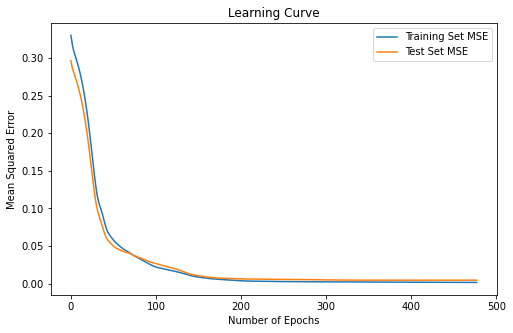

loss        0.001459
val_loss    0.004511
Name: 477, dtype: float64

In [37]:
import random as python_random

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()

model.add(Dense(32, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1]))

model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=100)

model_save = ModelCheckpoint('DNN_6metrics.hdf5', save_best_only=True)

history = model.fit(X_train, y_train, epochs = 10000, validation_data = (X_test, y_test),
                    callbacks = [early_stopping, model_save], verbose=0, batch_size=X_train.shape[0])


y_pred_train = model.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns
 
y_pred_test = model.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

metrics_data = pd.DataFrame(history.history)

plt.figure(figsize=(8,5))
plt.plot(metrics_data['loss'])
plt.plot(metrics_data['val_loss'])
plt.title('Learning Curve')
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of Epochs')
plt.legend(['Training Set MSE', 'Test Set MSE'])
plt.show()

metrics_data.iloc[-1,:]

In [38]:
# Store Neural Network Regression Scores

train_rmse['Neural Network Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Neural Network Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Neural Network Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Neural Network Regression'] = r2_score(y_test,y_pred_test)

## ML Algorithm Performance Visualization

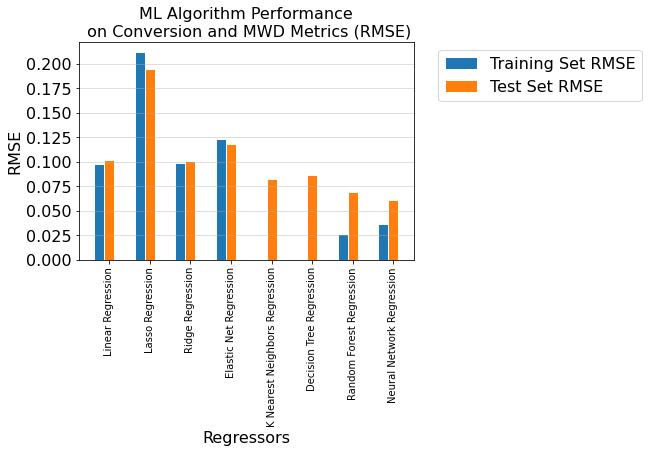

In [41]:
barwidth = 0.25

bars1 = train_rmse.values()
bars2 = test_rmse.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set RMSE')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set RMSE')

plt.xlabel('Regressors', fontsize=16)
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.yticks(fontsize=16)
plt.ylabel('RMSE', fontsize=16)
plt.title('ML Algorithm Performance\n on Conversion and MWD Metrics (RMSE)', fontsize=16)
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
plt.show()

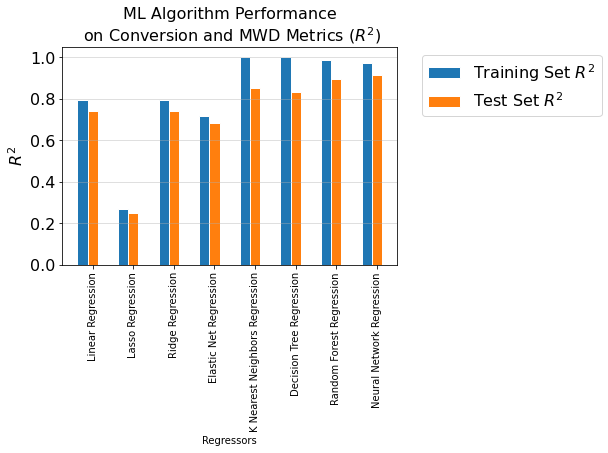

In [42]:
barwidth = 0.25

bars1 = train_r2.values()
bars2 = test_r2.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set $R^{2}$')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set $R^{2}$')

plt.xlabel('Regressors')
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.yticks(fontsize=16)
plt.ylabel('$R^{2}$', fontsize=16)
plt.title('ML Algorithm Performance\n on Conversion and MWD Metrics ($R^{2}$)', fontsize=16)
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
plt.show()